# Assignment 2 - Codebook 3
Emma McCready\
sba23001

---

# Sentiment Analysis of Ireland's Transport Data

For this analysis, I used `Octoparse` `(Version 8.6.7)` to scrape two webpages to garner reviews to assess public opinion of Ireland's national rail service, **Iarnród Éireann (AKA Irish Rail)**. Octoparse is a programme used for high-speed web scraping with no coding required, and has customisable workflows and a helper wizard tool to assist in the task. This option was chosen for the sake of time efficiency. The webpages scraped were the following:
* [TripAdvisor](https://www.tripadvisor.ie/Attraction_Review-g186605-d7940415-Reviews-Irish_Rail-Dublin_County_Dublin.html)

This website was chosen as some social media websites (e.g. X, Meta) block web-scraping, either by making it very difficult or by hiding it behind a paywall. The scraped data were downloaded as .csv files. Another advantage of using Octoparse is that it automatically removes duplicates. The downside to Octoparse is that it's a paid service. The data used in this sentiment analysis was collected using the free trial.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
warnings.filterwarnings('ignore') 

#####

tripadvisor = pd.read_csv("IrishRailReviews_TripAdvisor.csv")

# 1. Data Pre-Processing

I first have to prepare the data, so first I'll just get some information about the dataset. As I didn't follow a template when usng the Octoparse software for this task, the dataset is in an unusual format with unusual names.

In [2]:
tripadvisor.head()

,Title,Title_URL,Image,bigqs_URL,bigqs,bigqs1,iugum,bigqs2,rpecd,jguwg_spancontainsclass_ycete,bigqs3,bigqs4
0,NaN,NaN,NaN,NaN,NaN,"Moate, Ireland",8 contributions,0.0,Nov 2023 • Solo,Have to say Ritchie who works for ye on platfo...,Written 4 January 2024,This review is the subjective opinion of a Tri...
1,NaN,NaN,NaN,NaN,NaN,1 contribution,NaN,0.0,Dec 2023 • Couples,ABSOLUTEY AWFUL\n\nTook the train a train from...,Written 28 December 2023,This review is the subjective opinion of a Tri...
2,NaN,NaN,NaN,NaN,NaN,"London, UK",10 contributions,0.0,Dec 2023 • Solo,"Station locked at 1pm, no toilets available. T...",Written 20 December 2023,This review is the subjective opinion of a Tri...
3,NaN,NaN,NaN,NaN,NaN,3 contributions,NaN,0.0,Dec 2023 • Solo,Had a nice window seat going down enjoyed my t...,Written 19 December 2023,This review is the subjective opinion of a Tri...
4,NaN,NaN,NaN,NaN,NaN,"Dublin, Ireland",10 contributions,0.0,Nov 2023 • Business,The seat reservation system is incredibly frus...,Written 30 November 2023,This review is the subjective opinion of a Tri...


In [3]:
tripadvisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          0 non-null      float64
 1   Title_URL                      0 non-null      float64
 2   Image                          0 non-null      float64
 3   bigqs_URL                      0 non-null      float64
 4   bigqs                          0 non-null      float64
 5   bigqs1                         411 non-null    object 
 6   iugum                          297 non-null    object 
 7   bigqs2                         411 non-null    float64
 8   rpecd                          411 non-null    object 
 9   jguwg_spancontainsclass_ycete  411 non-null    object 
 10  bigqs3                         411 non-null    object 
 11  bigqs4                         411 non-null    object 
dtypes: float64(6), object(6)
memory usage: 38.8+ KB


The data contains 412 observations and 12 column. The first 5 cols are empty so they can be dropped. We're not interested in person data or dates, only the review itself, so I will filter the dataset to include just the column with the review (`jguwg_spancontainsclass_ycete`). I'll also rename this column because it's a very nonspecific. I note there's 1 observation with missing data so I'll drop that also after I filter the data using a boolean mask.

In [4]:
tripadvisor = tripadvisor.rename(columns = {'jguwg_spancontainsclass_ycete':'review'}) # easier to call
ta = tripadvisor[['review']] # to isolate reviews. ta is easier to call than tripadvisor
ta = ta.dropna() # getting rid of missing value

In [5]:
ta.describe()

,review
count,411
unique,411
top,Have to say Ritchie who works for ye on platfo...
freq,1


Now I can see there's 411 reviews, and each of them are unique, so there are definitely no duplicates.  
I wanted to see what the reviews might look like and if there's any special text to be removed. I note there's some \n (new line character) which will have to be removed.  
There also seems to be emojis. I don't know what to do with them, so I'll start by keeping them there. If I feel they are unnecessary noise, I can use the emoji library to remove them.
Similarly, with punctuation, I'll assess the performance of the model first before I remove punctuation
  
  
I will now have to pre-process the data. I'll:
* remove new line character
* make it all lower case
    * ensures uniformity in text
* after making lower case, I'll tokenise (necessary step for VADER analysis - see below)     
* remove punctuation - !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    * reduces noise
* use stopwords (from the nltk.corpus library) 
* stem the data to chop off word suffixes using PorterStemmer to normalise the text

In [6]:
column_list = ta['review'].tolist()
#column_list

In [7]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
import string
from nltk.stem import PorterStemmer


stop_words = stopwords.words('english') 
punct = string.punctuation
stemmer = PorterStemmer()

cleaned_data = []

for i in range(len(ta)):
    review = re.sub('\n', ' ', ta.iloc[i].item())  # Remove \n
    review = review.lower()  
    review = word_tokenize(review)  # splitting into words
    review = [stemmer.stem(word) for word in review if (word not in stop_words) and (word not in punct)]  # Stemming and stopword removal
    review = ' '.join(review)
    cleaned_data.append(review)
    
print(cleaned_data)    

['say ritchi work ye platform go train novemb miss train ritchi ’ help explain hospit found reason go week oper anyth go wrong son ’ pick need get train home ritchi said work help possibl gentleman help credit irish rail great see', "absolutey aw took train train portlaois got told 's mainten issu made us wait full hour get anoth train sent origin train meant 45 minut journey straight dublin citi center meanwhil train sent stop everi stop nearli 2 hour late time got citi center cherri ontop entitl refund 'm open return ticket accord irish rail time ai n't valuabl aw servic avoid possibl", "station lock 1pm toilet avail app say train time 's clearli staff ask actual turn stand around guess eventu show dirti overcrowd sit floor usual mediocr would kind irish rail joke fit", 'nice window seat go enjoy trip newri anyway come back dark poor eyesight could see reserv number train sat besid someon could see letter number train pack overal enjoy trip come back nobodi told newri like dublin sai

In [8]:
cleaned_df = pd.DataFrame(cleaned_data, columns=['reviews']) # encountered issues during analysis so converted it to a df

# Sentiment Analysis

My next issue is that the data has no assiciated sentiment labels, which is needed for a sentiment analysis. To overcome this, I'll use a pre-trained model. VADER from NLTK is a simple and effective tool specifically designed for sentiment analysis. 

Ref:
[Medium Article: VADER for Sentiment Analysis](https://medium.com/@suntarekar/vader-for-sentiment-analysis-a29f3f1dbcad#:~:text=Sentiment%20Analysis%20with%20VADER%3A%20Moving,words%20without%20considering%20their%20relationships.)
* note this article uses the tqdm module to track progress of the analysis but I didn't deem this necessary as my dataset is relatively short (~400 obs)


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

result = {}

for i, row in cleaned_df.iterrows():
    text = row['reviews']
    myid = i
    result[myid] = sia.polarity_scores(text) # scores polarity


vaders = pd.DataFrame(result).T.reset_index().rename(columns={'index': 'i'})

vaders = vaders.merge(cleaned_df, how='left', left_index=True, right_index=True) # merging scores with original data

print(vaders.columns)

Index(['i', 'neg', 'neu', 'pos', 'compound', 'reviews'], dtype='object')


In [10]:
vaders # i can now see the scores

,i,neg,neu,pos,compound,reviews
0,0,0.090,0.629,0.282,0.8779,say ritchi work ye platform go train novemb mi...
1,1,0.099,0.872,0.029,-0.5719,absolutey aw took train train portlaois got to...
2,2,0.000,0.782,0.218,0.7964,station lock 1pm toilet avail app say train ti...
3,3,0.040,0.669,0.291,0.9477,nice window seat go enjoy trip newri anyway co...
4,4,0.076,0.848,0.076,0.0000,seat reserv system incred frustrat – consist f...
...,...,...,...,...,...,...
406,406,0.000,1.000,0.000,0.0000,'s reason passeng wait flood platform way trai...
407,407,0.017,0.854,0.129,0.9524,read mani review suggest regard car rental nee...
408,408,0.000,0.577,0.423,0.8750,realli impress return trip galway irish rail c...
409,409,0.163,0.837,0.000,-0.8834,someon explain irish rail offer option phone l...


## Visualising the sentiment data

I'll visualise the sentiment scores by plotting three bar charts: positive, neutral, and negative sentiments. I defined a function to categorise the scores to make the code a bit easier to read. Then I applied it to the compound sentiment value in the vaders dataset.

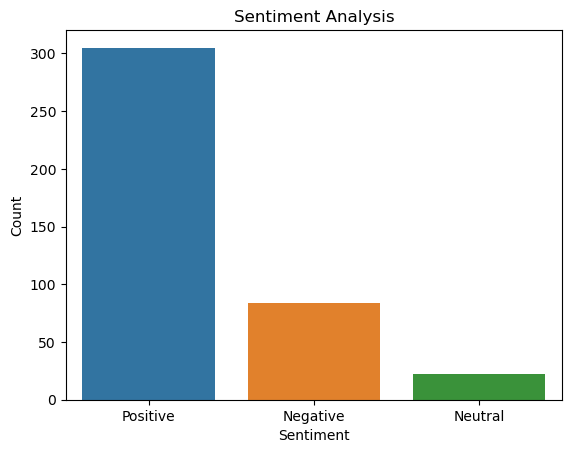

In [11]:
def categorise_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vaders['Sentiment'] = vaders['compound'].apply(categorise_sentiment)

sentiment_counts = vaders['Sentiment'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
total_entries = len(vaders)
sentiment_percentages = sentiment_counts / total_entries * 100 # to calculate % each sentiment accounts for
sentiment_percentages

Sentiment
Positive    74.209246
Negative    20.437956
Neutral      5.352798
Name: count, dtype: float64

# 3. Conclusion

On the TripAdvisor website, Irish rail is rated 3/5 stars. From running a sentiment analysis on the text of the reviews, I got a 74% positive sentiment rate, which isn't too far off 3/5. Negative sentiments were predominant in 20.4% of the reviews.